In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.metrics import (
    adaptive_calibration_error,
    brier_score,
    plot_calibration_curve)

In [2]:
graphics_format = ".png"
graphics_path = "/Users/christopher/Documents/University/Master/BEAR Confidence Estimation In LMs/Thesis/Graphics/"

In [3]:
scores = pd.read_json(
    "../results/instance_level_results.json",
    orient="records",
    lines=True)

# Experiment 3: Comparison of CLMs and MLMs

### Figure 5.6: Calibration curves model pairs

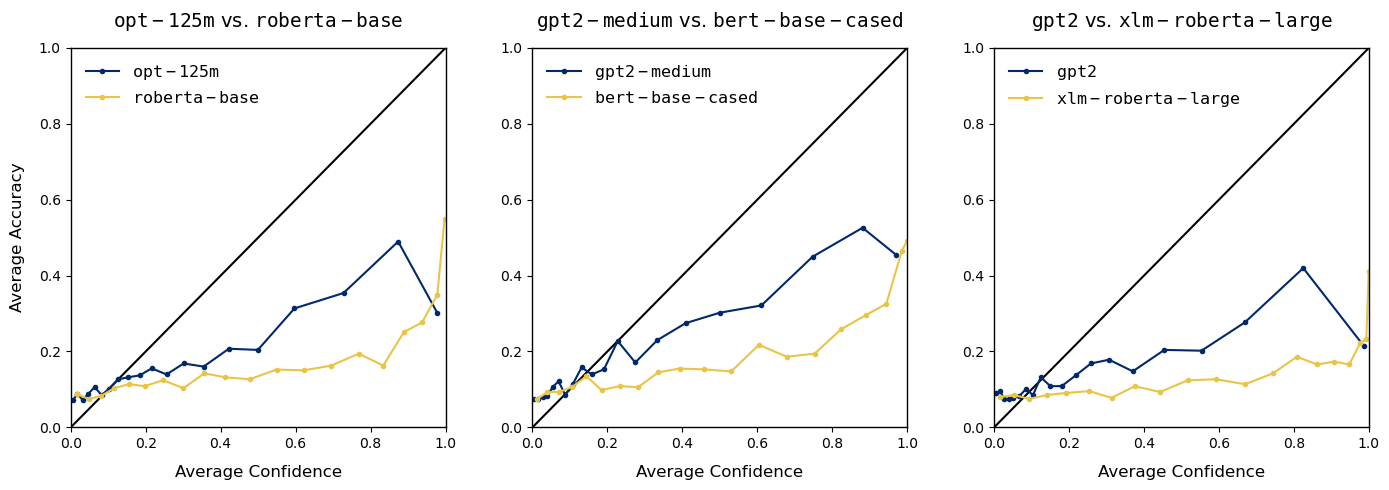

In [5]:
models = ["opt-125m", "roberta-base",
          "gpt2-medium", "bert-base-cased",
          "gpt2", "xlm-roberta-large"]

_, axes = plt.subplots(1, 3, figsize=(14, 5), facecolor="white", sharey=True)

for j in range(0, len(models), 2):
    m1 = scores[scores["model"] == models[j]]
    m2 = scores[scores["model"] == models[j+1]]
    plot_calibration_curve(
        title=rf"$\mathtt{{{models[j]}}}$ vs. $\mathtt{{{models[j+1]}}}$",
        predictions=[m1["correctly_predicted"].tolist(), m2["correctly_predicted"].tolist()],
        confidences=[m1["margin_conf"].tolist(), m2["margin_conf"].tolist()],
        n_bins=20,
        binning_strategy="quantile",
        labels=[rf"$\mathtt{{{models[j]}}}$", rf"$\mathtt{{{models[j+1]}}}$"],
        markers=[".", "."],
        colors=["#00296b", "#e8c547"],
        linestyles=["solid", "solid"],
        title_fontsize=13,
        legend_fontsize=12,
        axes_label_fontsize=12,
        axis=axes[j // 2]
    )
    if j != 0:
        axes[j // 2].set_ylabel("")
plt.savefig(graphics_path + "calibration_curves_clm_mlm_pairs" + graphics_format, dpi=600)

### Per-domain ACE and brier score for each model

In [5]:
d = {
    "model": [],
    "domain": [],
    "number_of_instances": [],
    "accuracy": [],
    "ace": [],
    "bs": []
}
for model in models:
    data = scores[scores["model"] == model]
    data = data.explode("domains")
    domains = data["domains"].unique().tolist()
    for domain in domains:
        per_domain_data = data[data["domains"] == domain]
        d["model"].append(model)
        d["domain"].append(domain)
        d["number_of_instances"].append(len(per_domain_data))
        acc = per_domain_data["correctly_predicted"].mean()
        ace = adaptive_calibration_error(
            per_domain_data["correctly_predicted"].tolist(),
            per_domain_data["margin_conf"].tolist(),
            n_bins=20
        )
        bs = brier_score(
            per_domain_data["plurality_correct"].tolist(),
            per_domain_data["consistency_conf_plurality"].tolist())
        d["accuracy"].append(acc)
        d["ace"].append(ace)
        d["bs"].append(bs)

In [6]:
df = pd.DataFrame(d)

In [7]:
# opt-125m
df[df["model"] == "opt-125m"]

,model,domain,number_of_instances,accuracy,ace,bs
0,opt-125m,Political,330,0.312121,0.078488,0.254424
1,opt-125m,Biographical,2847,0.174921,0.169549,0.352947
2,opt-125m,Historical,807,0.138786,0.337305,0.515291
3,opt-125m,Geographic,1401,0.276231,0.089536,0.365453
4,opt-125m,Arts,1623,0.113370,0.122159,0.306962
5,opt-125m,Movies,1350,0.080000,0.217409,0.329541
6,opt-125m,Scientific,360,0.127778,0.467971,0.421111
7,opt-125m,Economic,1110,0.119820,0.245533,0.368721
8,opt-125m,Sports,570,0.231579,0.080535,0.267719


In [8]:
# roberta-base
df[df["model"] == "roberta-base"]

,model,domain,number_of_instances,accuracy,ace,bs
9,roberta-base,Political,330,0.187879,0.443593,0.447515
10,roberta-base,Biographical,2847,0.175623,0.322269,0.367292
11,roberta-base,Historical,807,0.166047,0.457635,0.421016
12,roberta-base,Geographic,1401,0.276231,0.284950,0.368822
13,roberta-base,Arts,1623,0.118299,0.335184,0.323648
14,roberta-base,Movies,1350,0.087407,0.289216,0.318044
15,roberta-base,Scientific,360,0.238889,0.344917,0.257778
16,roberta-base,Economic,1110,0.137838,0.370252,0.376216
17,roberta-base,Sports,570,0.129825,0.422086,0.270807


In [9]:
# gpt2-medium
df[df["model"] == "gpt2-medium"].round(3)

,model,domain,number_of_instances,accuracy,ace,bs
18,gpt2-medium,Political,330,0.345,0.111,0.239
19,gpt2-medium,Biographical,2847,0.212,0.137,0.346
20,gpt2-medium,Historical,807,0.182,0.303,0.415
21,gpt2-medium,Geographic,1401,0.320,0.065,0.295
22,gpt2-medium,Arts,1623,0.136,0.119,0.277
23,gpt2-medium,Movies,1350,0.113,0.150,0.330
24,gpt2-medium,Scientific,360,0.144,0.384,0.302
25,gpt2-medium,Economic,1110,0.174,0.160,0.345
26,gpt2-medium,Sports,570,0.247,0.068,0.224


In [10]:
# bert-base-cased
df[df["model"] == "bert-base-cased"].round(3)

,model,domain,number_of_instances,accuracy,ace,bs
27,bert-base-cased,Political,330,0.179,0.396,0.508
28,bert-base-cased,Biographical,2847,0.174,0.329,0.468
29,bert-base-cased,Historical,807,0.150,0.519,0.584
30,bert-base-cased,Geographic,1401,0.363,0.186,0.365
31,bert-base-cased,Arts,1623,0.125,0.319,0.411
32,bert-base-cased,Movies,1350,0.087,0.292,0.485
33,bert-base-cased,Scientific,360,0.225,0.367,0.366
34,bert-base-cased,Economic,1110,0.166,0.274,0.390
35,bert-base-cased,Sports,570,0.126,0.348,0.327


### Confidence margin comparison for matching answers

In [11]:
# gpt2 & roberta-base
roberta = scores[scores["model"] == "roberta-base"]
gpt2 = scores[scores["model"] == "gpt2"]

joined_df = (
    roberta
    .merge(gpt2, how="left", on=["relation", "instance"], suffixes=("_roberta", "_gpt2"))
)

In [12]:
joined_df["answer_match"] = (
    joined_df
    .apply(lambda row: row["predicted_index_roberta"] == row["predicted_index_gpt2"], axis=1)
)
joined_df = joined_df[joined_df["answer_match"]][["correctly_predicted_roberta",
                                                  "margin_conf_roberta",
                                                  "margin_conf_gpt2"]]

In [13]:
joined_df.groupby("correctly_predicted_roberta").mean()

,margin_conf_roberta,margin_conf_gpt2
correctly_predicted_roberta,,
False,0.504061,0.329868
True,0.726940,0.487705


In [14]:
# gpt2-medium & bert-base-cased
bert = scores[scores["model"] == "bert-base-cased"]
gpt2_medium = scores[scores["model"] == "gpt2-medium"]

joined_df = (
    bert
    .merge(gpt2_medium, how="left", on=["relation", "instance"], suffixes=("_bert", "_gpt2-medium"))
)

In [15]:
joined_df["answer_match"] = (
    joined_df
    .apply(lambda row: row["predicted_index_bert"] == row["predicted_index_gpt2-medium"], axis=1)
)
joined_df = joined_df[joined_df["answer_match"]][["plurality_correct_bert",
                                                  "consistency_conf_plurality_bert",
                                                  "consistency_conf_plurality_gpt2-medium"]]

In [17]:
print(f"BS gpt2-medium: "
      f"{brier_score(joined_df['plurality_correct_bert'], joined_df['consistency_conf_plurality_gpt2-medium'])}",
      f"\nBS bert-base: {brier_score(joined_df['plurality_correct_bert'], joined_df['consistency_conf_plurality_bert'])}")

BS gpt2-medium: 0.2687500000000001 
BS bert-base: 0.3046666666666667
